# En este cuaderno de Python vamos a practicar un poco los "log(fold-changes)" (i.e. lfc) y los Z-scores


Pueque esto parezca un poco abstracto (o que te haga pensar, "por qué estamos haciendo esto?") al principio.

Pero recuerda que los datos que vamos a estar trabajando mañana expresan el efecto de las distintas moleculas/compuestos en términos de: 

"log(fold-changes)" del crecimiento de las bacterias mutantes en presencia de compuestos químicas respecto a las bacterias en medio de cultivo sin ningun "drug compound"


### Comenzamos importando unas librerias. 


In [1]:

import matplotlib.pyplot as plt # libreria de Python para hacer graficas. 

### [EJERCICIO]: 
# import dos librerias mas: 
# numpy (para cálculo numérico) --> llamala np
# pandas (para analisis de datos con "dataframes") --> llamala pd


###

# Parte 1: log(fold-changes)

### EJEMPLO 1: Diez estudiantes del TCJ 2025 contaron cuantas sentadillas podian hacer el 1er de enero (2025) y cuantas podian hacer el 1ero de Mayo (2025)

En la celda de abajo (ya llenada) vamos a guardar lo datos en el formato arreglos ("arrays") de la liberia numpy (aqui llamada np). 

Piensa en los arrays como vectores (o simplemente listas de numeros, que puedes manipular con calculo numerico)

In [ ]:
# numero de sentadillas el 1ero de enero
num_enero = np.array([5, 2, 9, 4, 6, 8, 1, 5, 6, 12])

# numero de sentadillas el 1ero de Mayo
num_mayo = np.array([10, 8, 4.5, 32, 6, 12, 1, 50, 1, 14])

### Cual es el *fold-change* para cada estudiante? 

En Python puedes hacer aritmetica con numeros (e.g. 4/2 = 2)

Pero tambien puedes hacer manipulaciones de arreglos.

Divide los datos de Mayo entre los datos de Enero para sacar la tasa de cambio ("fold-change")

In [ ]:
### [EJERCICIO]: 
# Crea una variable llamada fc que sea
# los datos de Mayo entre los datos de Enero, 
# i.e. la tasa de cambio ("fold-change") 
# Despues imprime tu resultado (fc)



###

### Cual es el *fold-change* para cada estudiante en escala logaritmica (base 2)? 

In [ ]:
### [EJERCICIO]: 
# Usa la funcion log2() de numpy (np)
# para calcular el logaritmo base-2 de fc 
# Guarda el resultado en una variable (puedes llamarla l2fc)
# Imprime l2fc



###

## Ejemplo 2: 
### En su articulo en la revista Nature, Johnson et al. midieron: 

1. cuantas bacterias crecieron en el medio de cultivo "normal" (sin ningún antibiótico) i.e. condición control
2. cuantas bacterias crecieron en el medio de cultivo + 10 distintos antibioticos:

In [2]:
# Num. de bacterias en la condicion control
bacterias_control = np.array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100])

# Num. de bacterias cuando se agrega un antibiotico 
# i.e. 10 antibioticos distintos, se agrega uno a la vez.  
bacterias_abx = np.array([30, 100, 50, 10, 99, 30, 30, 25, 12.5, 1])

1. Cual es el *fold-change* en el numero de bacterias que crecieron en cada condicion? 

In [ ]:
### [EJERCICIO]: 


###


2. Cual es el *fold-change* en escala logaritmica base-2 en el numero de bacterias que crecieron en cada condicion? 

# Z-scores: 

En los datos de Johnson et al. que vamos a usar mañana, hay una columna de datos llamada "Z-scores". 

El objetivo de este ejercicio es para entender cómo se calcula el Z-score de un vector de datos. 

In [ ]:
valores_1 = np.random.normal(35, 15, 200)
valores_1[:10]

array([57.17498767, 46.28317191, 34.61203136, 42.03534827, 30.94128063,
       38.00620593, 24.28844507, 19.8781479 , 34.20470749, 35.54573281])

In [ ]:
valores_2 = np.random.normal(300, 100, 200)
valores_2[:10]

array([183.95003662, 300.52954256, 308.92393807, 525.84482367,
       370.09281008, 243.60927276, 266.35350094, 302.41939552,
       402.12818665, 484.36476894])

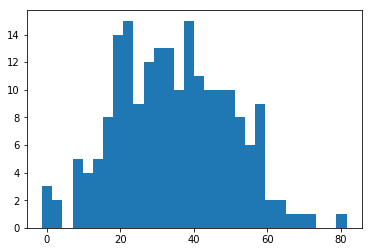

In [ ]:
hst1 = plt.hist(valores_1, 30)
plt.xlabel('')
plt.ylabel('')

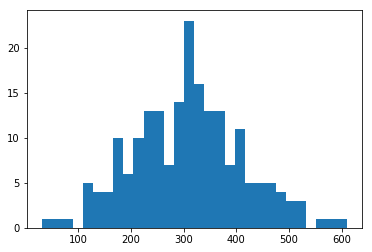

In [ ]:
hst2 = plt.hist(valores_2, 30)
plt.xlabel('')
plt.ylabel('')

In [ ]:
val1_Z = (valores_1 - np.mean(valores_1)) / np.std(valores_1)

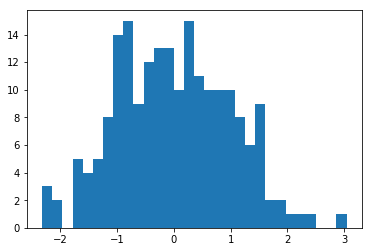

In [ ]:
hst = plt.hist(val1_Z, 30)

## EXTRA: Vamos a ordernar un poquito más nuestros datos, poniendolos en formato "dataframe" de la libería Pandas. 

In [ ]:
# 
df = pd.DataFrame()
df['valores_1'] = valores_1
df['Z-scores_1'] = (valores_1 - np.mean(valores_1)) / np.std(valores_1)

#
df['valores_2'] = valores_2
df['Z-scores_2'] = (valores_2 - np.mean(valores_2)) / np.std(valores_2)


In [ ]:
df

,valores_1,Z-scores_1,valores_2,Z-scores_2
0,57.174988,1.461821,183.950037,-1.193447
1,46.283172,0.757584,300.529543,-0.074109
2,34.612031,0.002957,308.923938,0.006490
3,42.035348,0.482930,525.844824,2.089255
4,30.941281,-0.234385,370.092810,0.593802
...,...,...,...,...
195,36.957731,0.154624,338.989828,0.295167
196,45.042800,0.677384,171.297121,-1.314934
197,23.730713,-0.700602,174.709137,-1.282174
198,20.397265,-0.916134,299.795459,-0.081158


## Ejercicio Z-scores: 

En el 2020, el año de la pandemia, Juanito comió hamburguesas con papas a la francesa **TODOS** los dias. 

Cada dia Juanito apuntó en su diario el número de papas se comió ese dia. 


Estos son los datos de Juanito

In [ ]:
papas_2020 = np.random.normal(400, 30, 365)
papas_2020 = [int(p) for p in papas_2020] # Esto es un pequ~o truco para convertir a numeros enteros. No importante ahora. 

1. Grafica el histograma (la distribucion) del numero de papas que comio Juanito en 2020: 

2. Cuantas papas comio en promedio cada dia en 2020? Cual es la desviacion estandar de esta distribucion? 

3. Convierte estos datos a un "z-score" (es decir, normaliza los datos de Juanito!)

4. Guarda estos datos (papas_2020 y los datos normalizados / el z-score) en un "pandas dataframe"